In [37]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
import IPython

In [5]:
n = 100
x_data = torch.linspace(-5, 5, n)
nu, scale = torch.tensor(0.), torch.tensor(1.)
noise = torch.FloatTensor([torch.normal(nu, scale) for _ in range(n)])

In [6]:
y_data = 2 * x_data + noise

In [71]:
lr = 1e-2
step_n = 30

loss: 0.7462897300720215


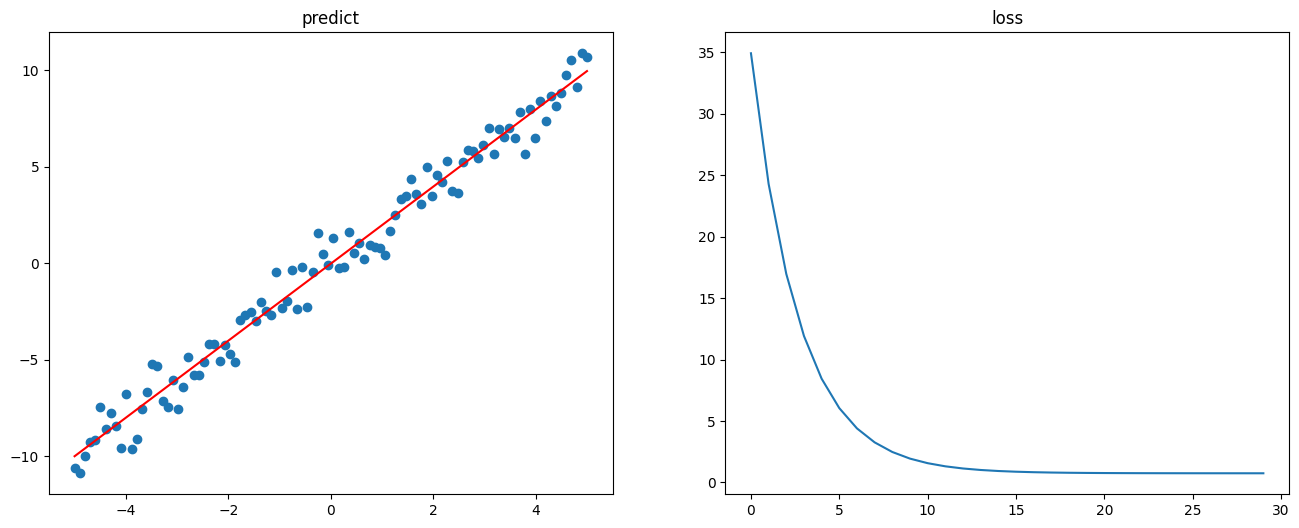

In [72]:
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

losses = []
for step in range(step_n):
    y_pred = w * x_data + b
    loss = torch.mean((y_data - y_pred) ** 2)
    loss.backward()
    losses.append(loss.data)

    w.data = w.data - lr * w.grad
    b.data = b.data - lr * b.grad
    w.grad.zero_()
    b.grad.zero_()

    print(f'loss: {loss.data.item()}')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.scatter(x_data, y_data)
    ax1.plot(x_data, y_pred.data, c='r')
    ax1.set_title('predict')
    
    ax2.plot(losses)
    ax2.set_title('loss')
    plt.show();
    time.sleep(0.1)
    IPython.display.clear_output(wait=True)